# Medical Data Visualize
The purpose of this notebook is to demonstrate my knowledge of manipulating and visulizing data. The data is provide by free code camp. See the following link for the link to the data, as well as the full description of the coding challenge: https://repl.it/@freeCodeCamp/fcc-medical-data-visualizer

In [32]:
import numpy as np
import pandas as pd
#For data visulization
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
df=pd.read_csv("medical_examination.csv")

In [34]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [35]:
#how large is the dataset
df.shape

(70000, 13)

In [36]:
#checking for missing value
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# Normalizing The Data
From the instructions given, in order for us to find out which patients (rows in the df) are overweight we must do the following: "calculate their BMI by dividing their weight in kilograms by the square of their height in meters." "If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight."

To normalize the data the following must be done: "make 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1."

See the following link for the full description of the challenge: https://repl.it/@freeCodeCamp/fcc-medical-data-visualizer#README.md

In [38]:
#converting height from centimeter to meter before calculating BMI
df["height"]=df["height"]/100
df["height"].head()


0    1.68
1    1.56
2    1.65
3    1.69
4    1.56
Name: height, dtype: float64

In [39]:
bmi=df["weight"]/df["height"]**2

In [41]:
bmi.head()

0    21.967120
1    34.927679
2    23.507805
3    28.710479
4    23.011177
dtype: float64

In [42]:
#creating BMI columns in dataset
df["BMI"]=bmi

In [43]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177


In [44]:
#creating overweighted columns
df.loc[df["BMI"]<=25, "overweight"]=0
df.loc[df["BMI"]>25, "overweight"]=1

In [47]:
df.overweight.head()

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: overweight, dtype: float64

# Recap of Normalizing Data
Now that the overweight column is created the next step is to normalize the data in 'gluc' and 'cholesterol'. Here are the instructions: "make 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1."*

In [58]:
# Normalize data in 'gluc' and 'cholesterol'

df.loc[df['gluc'] == 1, 'gluc'] = 0 
df.loc[df['gluc'] > 1, 'gluc'] = 1 

df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0 
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1

# Visualizing The Data: Correlation Heat Map Plot
Going back to the old dataframe, the instructions tell us to clean up the data in order to plot a heatmap. See the following link for the full description of the instructions for this function: https://repl.it/@freeCodeCamp/fcc-medical-data-visualizer#README.md

How to clean the data:

Filter out the following patient segments that represent incorrect data:

- diastolic pressure is higher then systolic (Keep the correct data with df['ap_lo'] <= df['ap_hi']))
- height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
- height is more than the 97.5th percentile
- weight is less then the 2.5th percentile.
- weight is more than the 97.5th percentile

# Visualizing The Data: Categorical Plot
Now that the work has been done to preprocess the data, it is time to plot the results. Below you will find the function created to plot a catplot using seaborn. Please note the full description of the instructions of this function can be found using the following link: https://repl.it/@freeCodeCamp/fcc-medical-data-visualizer#README.md

In [59]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` 
    # Use just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars = 'cardio', value_vars = ['cholesterol', 'gluc', 'smoke', 
                                    'alco', 'active', 'overweight'])

    '''This portion of the function is skipped because it is not needed. The parameters
    of catplot help split the data in the required format'''
    # Group and reformat the data to split it by 'cardio'. 
    # Show the counts of each feature. 
    # You will have to rename one of the columns for the catplot to work correctly.
    
    
    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(data=df_cat, kind='count', x='variable', hue='value', col='cardio')


    # Saving the plotted image
    fig.savefig('catplot.png')
    return fig

In [52]:
# Draw Heat Map
def draw_heat_map():
     # Clean the data
    df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) & 
    (df['height'] >= (df['height'].quantile(0.025))) &
    (df['height'] <= (df['height'].quantile(0.975))) &
    (df['weight'] >= (df['weight'].quantile(0.025))) &
    (df['weight'] <= (df['weight'].quantile(0.975)))
    ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Upper triangle of an array. The triu() function is used to get a copy of a 
    # matrix with the elements below the k-th diagonal zeroed.Feb 26, 2020
    mask = np.triu(corr)



    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(9,9))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, linewidths=1, mask=mask, vmax=.3, center=0.09,
                square=True, cbar_kws = {'orientation' : 'horizontal'})


    # Saving the plotted image
    fig.savefig('heatmap.png')
    return fig

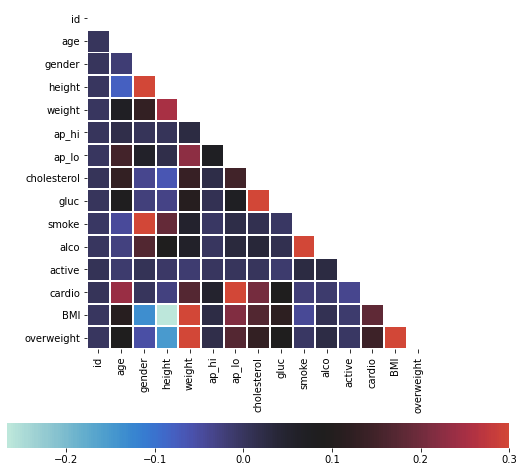

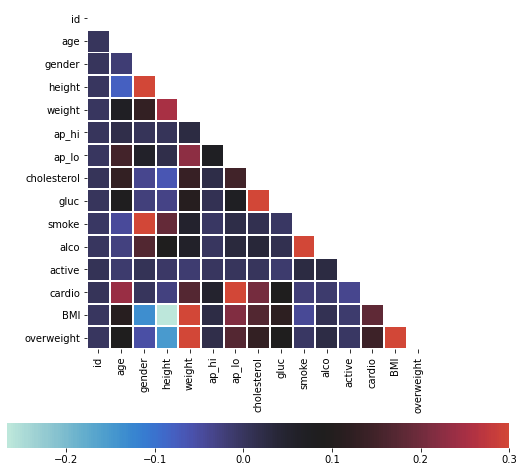

In [57]:
draw_heat_map()

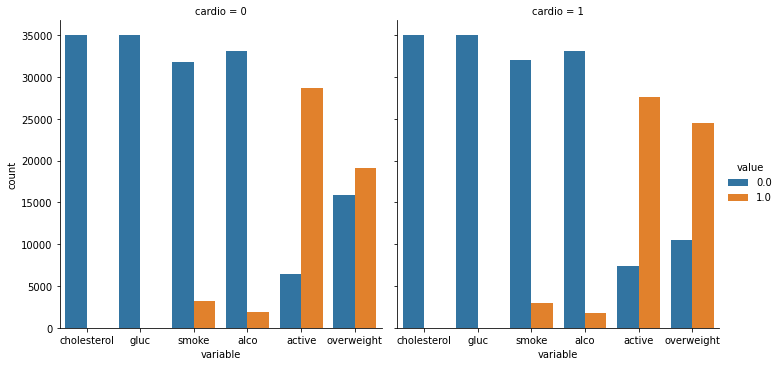

In [61]:
draw_cat_plot()